# Overfitting in Classification - Example using Logistic Regression
In regression, overfitting typically corresponded to an approximation way to accurate on the training set that performed badly on the test set. In classification, overfitting has the same effect, good performance on the train and bad performance on the test. 

First we load the usual libraries.

In [2]:
import numpy as np
import math
import matplotlib
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
import sklearn.datasets.samples_generator
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold

#from sklearn.model_evaluation import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

We generate two moon-shaped groups of points labeled differently and plot them.

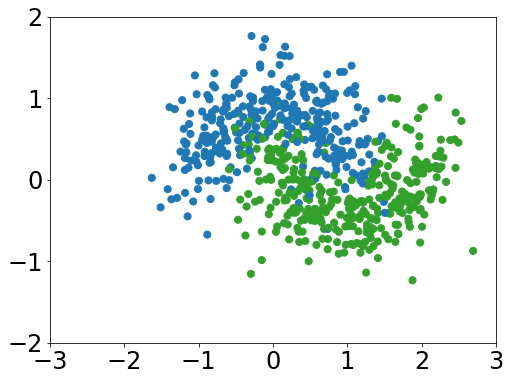

In [3]:
### Color maps for plotting
data_points_cm = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[1],plt.cm.Paired.colors[3]], name='DataPointsColorMap')
ds_points_cm = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[0],plt.cm.Paired.colors[2]], name='DecisionSurfaceColorMap')

### 
mx,my = datasets.samples_generator.make_moons(n_samples=1000, noise=0.3, random_state=1234)

train_x, test_x, train_y, test_y = model_selection.train_test_split(mx, my, test_size=0.33, random_state=42)

plt.figure(1, figsize=(8, 6))
font = {'family':'sans', 'size':24}
plt.rc('font', **font)
plt.xlim([-3,3])
plt.ylim([-2,2])
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap=data_points_cm, s=50);

First, we apply plain logistic regression which generates a decision hyperplane. Since we are dealing with two variables only, and thus we are in a 2D space, the hyperplane is actually a line.

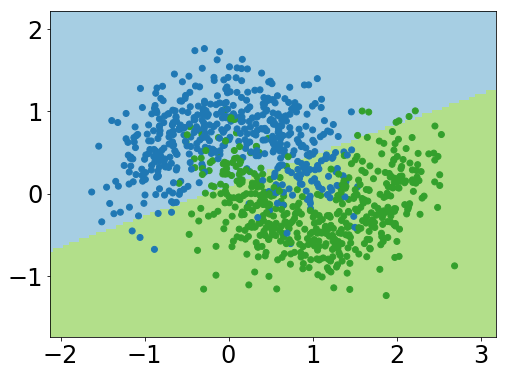

In [4]:
logistic = linear_model.LogisticRegression(C=10e10)
logistic.fit(train_x,train_y)
xval = model_selection.cross_val_score(logistic,mx,my)

yp = logistic.predict(mx)

def PlotDecisionBoundaries(model, x, y):
    '''given a model and the dataset (x are the input variables, y is the predicted label)
    it plots the decision boundaries.'''
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x0_min, x0_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    x1_min, x1_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    
    h = min((x0_max-x0_min),(x1_max-x1_min))/100.0
    
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    Z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx0.shape)

    plt.figure(1, figsize=(8, 6))
    font = {'family':'sans', 'size':24}
    plt.rc('font', **font)
    plt.pcolormesh(xx0, xx1, Z, cmap=ds_points_cm)
    plt.scatter(x[:,0],x[:,1],c=y, cmap=data_points_cm)   
    
PlotDecisionBoundaries(logistic, mx, my)

Next we generate polynomials of increasing degrees, compute a model using simple logistic regression, and evaluate each model using crossvalidation.

In [5]:
degrees = range(2,21)
mu = np.zeros(len(degrees))
sigma = np.zeros(len(degrees))

for i,d in enumerate(degrees):
    poly = PolynomialFeatures(d)
    px = poly.fit_transform(mx)
    px = px[:,1:]
    
    logistic = linear_model.LogisticRegression(C=10e10)
    logistic.fit(px,my)
    xval = model_selection.cross_val_score(logistic,px,my,cv=StratifiedKFold(10,shuffle=True,random_state=1234))
    mu[i] = np.average(xval)
    sigma[i] = np.std(xval)


We plot the mean accuracy for each degree of the polynomial. Note that the best performance is reached for a polynomial of degree 3.

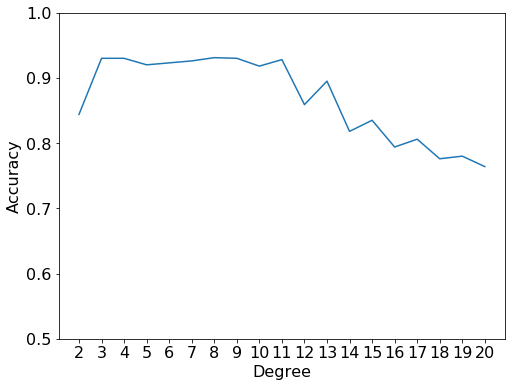

In [6]:
plt.figure(1, figsize=(8, 6))
font = {'family':'sans', 'size':16}
plt.rc('font', **font)

plt.xticks(degrees)
plt.ylim([0.5,1.0])
plt.ylabel('Accuracy')
plt.xlabel('Degree')
plt.plot(degrees,mu);

In [7]:
def PlotPolynomialDecisionBoundaries(model, x, y, d=1):
    '''given a model and the dataset (x are the input variables, y is the predicted label)
    it plots the decision boundaries.'''
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x0_min, x0_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    x1_min, x1_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    
    h = min((x0_max-x0_min),(x1_max-x1_min))/100.0
    
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    
    #Z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    poly = PolynomialFeatures(d)
    new_x = poly.fit_transform(np.c_[xx0.ravel(),xx1.ravel()])
    new_x = new_x[:,1:]
    
    Z = model.predict(new_x)

    # Put the result into a color plot
    Z = Z.reshape(xx0.shape)

    plt.figure(1, figsize=(8, 6))
    font = {'family':'sans', 'size':24}
    plt.rc('font', **font)
    plt.pcolormesh(xx0, xx1, Z, cmap=ds_points_cm)
    plt.scatter(mx[:,0],mx[:,1],c=my, cmap=data_points_cm, s=50)  

First, let's check out the decision plane for the best model.

AVERAGE ACCURACY = 0.93 +/- 0.02


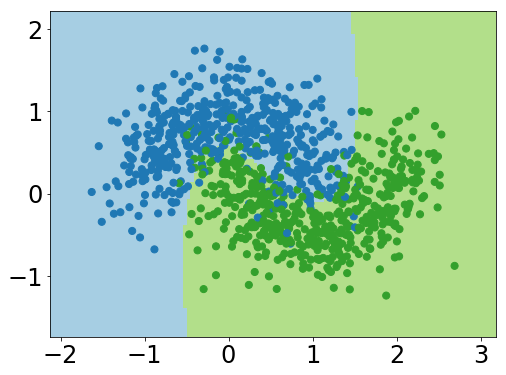

In [8]:
degree = 3
poly = PolynomialFeatures(degree)
px = poly.fit_transform(mx)
px = px[:,1:]
logistic = linear_model.LogisticRegression(C=10e10)
logistic.fit(px,my)

xval = model_selection.cross_val_score(logistic, px, my)

PlotPolynomialDecisionBoundaries(logistic, px, my,degree)
print("AVERAGE ACCURACY = %3.2f +/- %3.2f"%(np.average(xval),np.std(xval)))

Next, we plot the decision boundary for one of the worst performing configurations (a polynomial of degree 20)

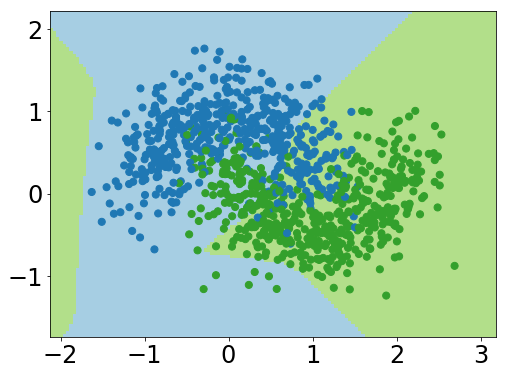

In [14]:
degree = 20
poly = PolynomialFeatures(degree)
px = poly.fit_transform(mx)
px = px[:,1:]
logistic = linear_model.LogisticRegression(C=10e10)
logistic.fit(px,my)
PlotPolynomialDecisionBoundaries(logistic, px, my,degree)

TRAIN = 0.93	TEST = 0.93


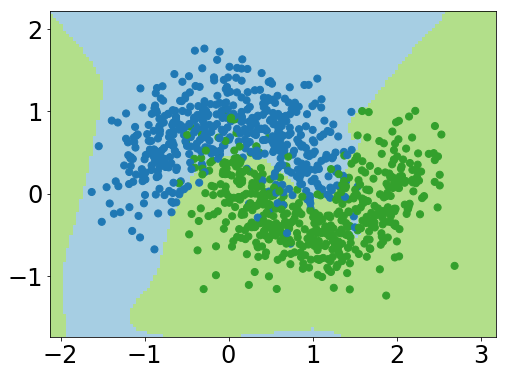

In [11]:
degree = 20
poly = PolynomialFeatures(degree)
px = poly.fit_transform(train_x)
px = px[:,1:]

test_px = poly.fit_transform(test_x)
test_px = test_px[:,1:]


logistic_cv = linear_model.LogisticRegressionCV(cv=StratifiedKFold(10,shuffle=True,random_state=1234),random_state=1295)
logistic_cv.fit(px,train_y);
PlotPolynomialDecisionBoundaries(logistic_cv, px, train_y,degree)

print("TRAIN = %3.2f\tTEST = %3.2f"%(logistic_cv.score(px,train_y), logistic_cv.score(test_px,test_y)))